In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
# !pip show tensorflow
# !pip show keras
# !pip uninstall keras
# !pip install keras --upgrade

In [3]:
# import the libraries 
# if tf<2.0 keras.  ... else tensorflow.keras. ...

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

# from keras.application.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# resize all the images 
# resnet default; so directly we gave 224 (depends on the quality as well)
IMAGE_SIZE = [224,224]

train_path = 'Dataset/train'
test_path = 'Dataset/test'

In [5]:
# import the resnet50 library os and add preprocessing layer to the front of resnet
# we use 'imagenet' weights -> pretrained

# [3] because [224,224]+[3] img in is 3 channels RGB; so making it as RGB imgs
# include_top : no need to include inbuilt top and last layers because we provide own dataset.

resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 64s 1us/step


In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [8]:
# not training existing weights initially
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# fetch no of output classes
folders = glob('Dataset/train/*')
folders

['Dataset/train\\audi',
 'Dataset/train\\lamborghini',
 'Dataset/train\\mercedes']

In [12]:
# flatten the layer of inbuilt resnet 
x = Flatten()(resnet.output)

In [16]:
prediction = Dense(len(folders), activation = 'softmax')(x)

# create a model object
model = Model(inputs = resnet.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [18]:
# defining cost and optimization method
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [19]:
# images are imported from the dataset using ImageDataGenerator
# before using Image Data Generator we have to rescale; becoz each img each size(ht, wt) and diff rgb values
# pixel range fro 0 to 255 -> converts tp [0,255]

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # 20%
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# test data never data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
# same target size as initialized for the img size
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size=(224,224), # as initialised before
                                                 batch_size = 32, # fetch 32 imgs at once; the lesser, the efficient to train
                                                 class_mode = 'categorical') # >2 class else binary

Found 64 images belonging to 3 classes.


In [22]:
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [23]:
# fir the model  ->  takes some time dude
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps = len(test_set)
)

C:\Users\My\AppData\Local\Temp\ipykernel_14340\2291712896.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 58s 37s/step - loss: 3.7437 - accuracy: 0.3594 - val_loss: 17.3137 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 64s 48s/step - loss: 10.3106 - accuracy: 0.3906 - val_loss: 11.8034 - val_accuracy: 0.1724
Epoch 3/50
2/2 [==============================] - 63s 45s/step - loss: 6.4332 - accuracy: 0.3594 - val_loss: 2.8137 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 63s 46s/step - loss: 2.3068 - accuracy: 0.4531 - val_loss: 4.4207 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 48s 32s/step - loss: 4.3668 - accuracy: 0.3594 - val_loss: 4.5189 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 52s 39s/step - loss: 3.5385 - accuracy: 0.3750 - val_loss: 2.0851 - val_accuracy: 0.3448
Epoch 7/50
2/2 [==============================] - 55s 40s/step - loss: 1.9170 - accuracy: 0.5000 - val_loss: 2.9627 - val_accuracy: 0.3276
Epoch 8/50
2/2 [========

In [24]:
# information abt the training
r.history

{'loss': [3.7437262535095215,
  10.310644149780273,
  6.4332051277160645,
  2.306847333908081,
  4.36680793762207,
  3.538492202758789,
  1.9170105457305908,
  2.8680927753448486,
  2.3513338565826416,
  1.1571381092071533,
  1.7850099802017212,
  1.3121802806854248,
  1.289811611175537,
  1.3071118593215942,
  0.7053858041763306,
  0.9690659046173096,
  0.6549680829048157,
  0.8026418685913086,
  0.510891854763031,
  0.6557787656784058,
  0.5088421702384949,
  0.4570658802986145,
  0.47036421298980713,
  0.46558481454849243,
  0.3553207814693451,
  0.30028241872787476,
  0.3359152376651764,
  0.3251809775829315,
  0.30834105610847473,
  0.2914237976074219,
  0.29023149609565735,
  0.28606492280960083,
  0.2828481197357178,
  0.3595697283744812,
  0.27639344334602356,
  0.2721197307109833,
  0.22903487086296082,
  0.24621619284152985,
  0.19610536098480225,
  0.25941944122314453,
  0.23313918709754944,
  0.2484731376171112,
  0.22581245005130768,
  0.2270800918340683,
  0.2237091362476

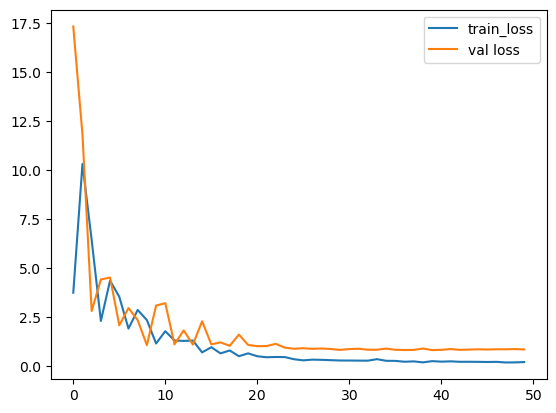

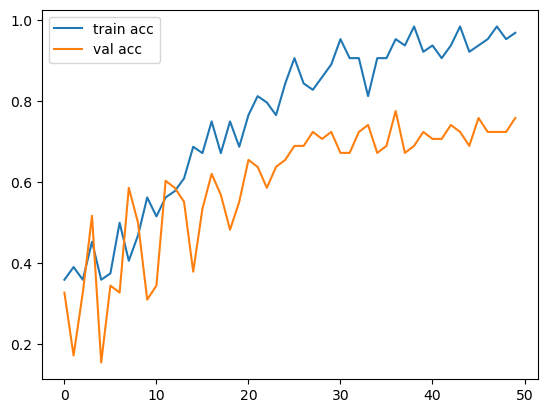

<Figure size 640x480 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig("AccVal_acc")

In [27]:
# save the model as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [28]:
y_pred = model.predict(test_set)

2/2 [==============================] - 25s 10s/step


In [30]:
# in dl, imbalance data can be overcome by addding more data in training dataset
# returns each imgs' each categories's prob in asc order

y_pred

array([[6.50579557e-02, 7.64751852e-01, 1.70190245e-01],
       [1.01824850e-01, 7.33000457e-01, 1.65174738e-01],
       [1.59353204e-02, 6.02445245e-01, 3.81619394e-01],
       [3.62241082e-02, 1.91607893e-01, 7.72168040e-01],
       [8.83137703e-01, 7.04352930e-02, 4.64269966e-02],
       [3.06906968e-01, 6.44622520e-02, 6.28630817e-01],
       [4.33199853e-03, 4.52612877e-01, 5.43055177e-01],
       [1.76389646e-02, 5.62184095e-01, 4.20176953e-01],
       [1.76152691e-01, 4.60121870e-01, 3.63725424e-01],
       [1.64296944e-02, 6.67638898e-01, 3.15931410e-01],
       [3.63709609e-04, 9.91149545e-01, 8.48674960e-03],
       [1.44598829e-02, 4.05661995e-03, 9.81483519e-01],
       [3.73707302e-02, 5.35555899e-01, 4.27073419e-01],
       [4.39214446e-02, 3.15558650e-02, 9.24522758e-01],
       [2.63143387e-02, 3.25506002e-01, 6.48179650e-01],
       [1.08536430e-01, 2.94124484e-01, 5.97339034e-01],
       [1.93347663e-01, 5.20792067e-01, 2.85860270e-01],
       [8.54031891e-02, 2.05614

In [31]:
# take max prob in each row for each class 

y_pred = np.argmax(y_pred, axis=1)
y_pred

# can use pred_class -> same op

array([1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2], dtype=int64)

In [44]:
# model = load_model('model_resnet50.h5')
# img_data

In [33]:
# prediction for new dataset
img = image.load_img('./Dataset/Test/lamborghini/10.jpg', target_size=(224,224))

In [34]:
# our img
image

<module 'tensorflow.keras.preprocessing.image' from 'c:\\Users\\My\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

In [35]:
# imp
x = image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [36]:
x.shape

(224, 224, 3)

In [37]:
# for this value of x only do prediction -> imp
x=x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [38]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[0.01555798, 0.38260356, 0.6018385 ]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 472ms/step


In [46]:
a

array([2], dtype=int64)

In [47]:
a==1

array([False])